<a href="https://colab.research.google.com/github/jordan-pierre/cv-clothing-extraction/blob/main/dress_detection_with_pretrained.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dress detection using pretrained model


Adapted from https://github.com/jordan-pierre/Fashion-AI-segmentation/blob/master/run.py.
<br>*Alternatively, could train my own detection model using UNET outlined [here](https://github.com/cerlymarco/MEDIUM_NoteBook/blob/master/Dress_Segmentation/Train_UNET.ipynb).*

In [1]:
import cv2
import numpy as np
import tensorflow as tf

from tensorflow.keras.models import load_model

In [2]:
import os
os.getcwd()

'/content'

In [3]:
# pretrained model downloaded here: https://drive.google.com/u/0/uc?id=1l7PUB8uAGRyqvZ0ti0ZACoI2CzJxOVoI&export=download
model = load_model(r'save_ckp_frozen_new.h5')

In [4]:
def get_dress(image, model, side_by_side=False):
    """limited to top wear and full body dresses (wild and studio working)"""
    """takes input rgb----> return PNG"""
    image = tf.image.resize_with_pad(image,target_height=512,target_width=512)
    rgb = image.numpy()
    image = np.expand_dims(image,axis=0) / 255.
    seq = model.predict(image)
    seq = seq[3][0,:,:,0]
    seq = np.expand_dims(seq,axis=-1)
    c1x = rgb * seq
    c2x = rgb * (1-seq)
    cfx = c1x+c2x
    dummy = np.ones((rgb.shape[0], rgb.shape[1],1))
    rgbx = np.concatenate((rgb, dummy*255), axis=-1)
    rgbs = np.concatenate((cfx, seq*255.), axis=-1)
    if side_by_side:
        stacked = np.hstack((rgbx, rgbs))
        return stacked
    else:
        return rgbs

In [5]:
# Read image
image_dir = 'images/'
outfile_name = 'processed_image.png'
original = cv2.imread(image_dir + 'wardrobe-1599754189979.jpg')

In [6]:
# Process image
stacked_processed_image = get_dress(original, model, side_by_side=True)
processed_image = get_dress(original, model, side_by_side=False)
cv2.imwrite(outfile_name, processed_image)

True

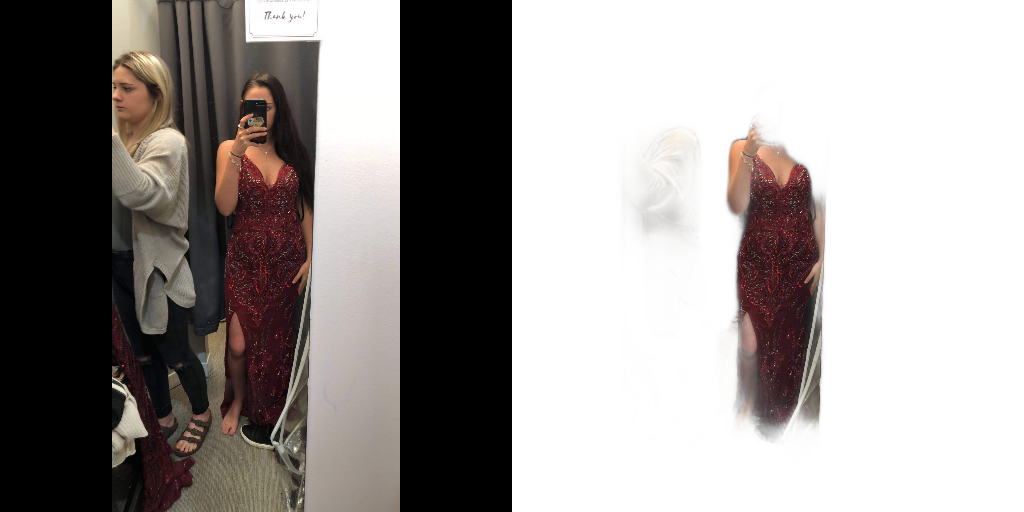

In [7]:
# Show in collab notebook (will fail in anaconda)
from google.colab.patches import cv2_imshow

cv2_imshow(stacked_processed_image)

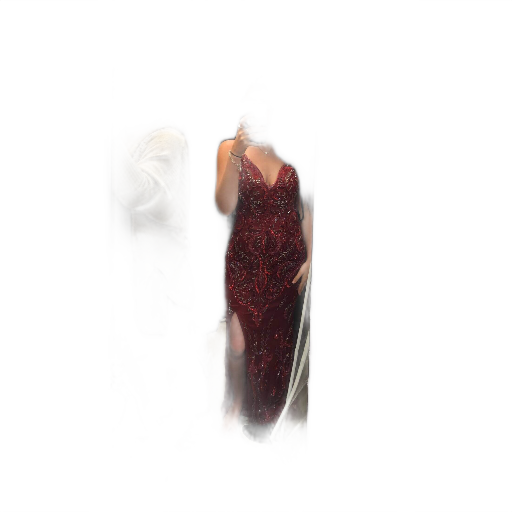

In [8]:
# Show in collab notebook (will fail in anaconda)
from google.colab.patches import cv2_imshow

cv2_imshow(processed_image)

In [9]:
# # Show in regular anaconda notebook
# import matplotlib.pyplot as plt

# preview_size = (512,512)
# plt.subplot(1,2,1)
# plt.imshow(original)

# plt.subplot(1,2,2)
# plt.imshow(processed_image)

In [10]:
# Show in regular anaconda notebook

# cv2.imshow(stacked_processed_image)